# COGS 188 - Project Proposal

## Names
- Denny Yoo
- Jeffrey Yang
- Samantha Prestrelski
- Yash Pakti

## Abstract 
According the Insurance Institute for Highway Safety (IIHS), there were 42,939 people that died in motor vehicle crashes in the US 2021, and of the 12,330 speeding-related fatalities, about half (53%) occurred on roads with speed limits lower than 55 mph. <a name="fatalitystats"></a>[<sup>[4]</sup>](#fatalitystats). Given the current push towards autonomous vehicle systems, self-driving algorithms need to be able to adapt to potentially antagonistic drivers that are driving over the speed limit and moving erratically. 

Our project builds upon an [autonomous driving environment](https://github.com/Farama-Foundation/HighwayEnv) to explore agent decision-making with antagonistic vehicles. Given simulations simulate a normal driving environment where the ego vehicle has the same interaction parameters all other vehicles. The goal of our project is to develop a new environment where all other vehicles are antagonistic, or acting in unpredictable and unsafe ways. We compare the efficacy of multiple reinforcement learning algorithms including Proximal Policy Optimization (PPO), Deep Q-Networks (DQN), and Advantage Actor Critic (A2C).

TODO: results

## Background
There has been an explosion of vehicles with autonomous capabilities whether it's for parking or driving on busy highways. According to the Center for Sustainable Systems at the University of Michigan, Tesla vehicles have driven over 3 billion miles completely autonomously <a name="umich"></a>[<sup>[1]</sup>](#umich). Automated driving technologies have the potential to protect consumers on the road, increase transportation options, decrease vehicle crashes, and increase efficiency on the road <a name="nhtsa"></a>[<sup>[2]</sup>](#nhtsa). Exploring how to improve these autonomous systems and their limitations is key in creating robust systems that are safe and efficient. 

Reinforcement learning methods are well-adapted to autonomous driving tasks given the high-dimensional and dynamically-changing environment <a name="rlsurvey"></a>[<sup>[3]</sup>](#rlsurvey). The HighwayEnv package includes implementations for Value Iteration, Monte-Carlo Tree Search, and Deep Q-Networks and were tested on the "highway" task, where the agent aims to reach and maintain a high speed while avoiding collisions with neighboring vehicles. Drunk driving and brake-checking are examples of antagonistic behaviors that can lead to crashes that aren't caused by the ego agent. Autonomous algorithms should be able to adapt to these unexpected behaviors to ensure safe driving. We evaluate different RL models on our custom highway environment to see how they adapt to more aggressive drivers.

## Problem Statement
Can we use reinforcement learning to develop agents where a vehicle follows proper traffic laws while avoiding and adapting to antagonistic traffic?

The problem is quantifiable and can be modeled as a Markov Decision Process. The problem is inherently continuous but can be quantified as a discrete process using “env.to_finite_mdp()” if needed. States can be mathematically represented by position of vehicle, velocity, lane index, etc. Within the environment, actions are prescribed high-level descriptions such as “Faster”, “Slower”,  “Stop”, or “Lane_Left” which control the velocity or steering angle of the vehicle.

Agent performance can be measured through various metrics such as number of collisions, lane changes, or ability to maintain speed. The efficiency of a reward function, specifically, may be measured through the time or number of iterations needed for a model to converge to an optimal policy.

Our problem is replicable as we are using an open source environment for our self-driving tasks. We will use the same initial conditions and parameters for each training run in order to ensure consistent results and valid comparisons across models. Additionally, for nondeterministic algorithms, we will consistently initialize the random_state parameter to the same number.

We will discuss the reinforcement learning algorithms further in the proposed solution section, but we will use methods including Proximal Policy Optimization (PPO), Deep Q-Networks (DQN), and Advantage Actor Critic (A2C) to solve our custom highway environment.

## Data

We will use the Highway Environment framework to develop a custom 2D simulation environment built with OpenAI Gym to simulate this negotiation task. The framework natively includes tasks such as lane switching, merging, navigating roundabouts and intersections, parking, and racing. The objective is to develop an environment that optimizes the ego agent's speed while avoiding collisions.

Each state in the environment is represented by multiple variables, including the agent’s position, positions of other cars, acceleration, and steering. The action spaces for the environments are diverse and include:

- Continuous actions: For fine-grained control over acceleration and steering.
- Discrete actions: For predefined maneuvers like lane changes and stopping.
- Manual control: For user-directed actions to guide the agent during training.

To train the agent, we will use our custom environment and a subset of the natively implemented environments and keep track of critical variables such as:

- Time steps: The number of steps taken during each simulation episode.
- Actions taken: The specific actions chosen by the agent at each time step.
- Rewards received: The rewards assigned to the agent based on the chosen actions and their outcomes.


For data visualization and monitoring, we will use TensorBoard. TensorBoard will help us track:

- Model training progress: Including loss and performance metrics over time.
- Rewards over time: Visualizing how the agent’s rewards improve with more training episodes.
- Specific logs: To track important variables and observe trends in the agent’s behavior and performance.

By using TensorBoard, we can gain valuable insights into the training dynamics, allowing us to fine-tune the reward functions and action policies to enhance the agent’s performance across different tasks.


## Proposed Solution

To address our problem, we will compare the performance of different reinforcement learning algorithms for continuous environments including PPO, DQN, and A2C. 

### Algorithm Descriptions <a name="rl-algs"></a>[<sup>[5]</sup>](#rl-algs)
PPO is an on-policy algorithm that maintains two networks, one with the current policy that we want to refine and a second that we use to collect samples. We then clip our objective function and calculate the ratio between the new policy and the old policy, thus optimizing it. PPO therefore is sensitive to the clipping ratio, as it can either slow or destabilize learning.

DQN uses experience replay to learn from all past policies, which means that it can efficiently learn optimal action values. However, it may suffer from overestimation of Q-values that can lead to instability during learning. 

A2C combines both value based learning and policy gradients. The Actor estimates each action based on the given policy, while the Critic estimates the value function of the action taken by the actor and evaluates it. A2C is an on-policy algorithm, which means that it can only learn from data generated by its current policy. 

All of these algorithms are made for continuous action spaces, as opposed to discrete action spaces like Q-learning or SARSA. Since the action space can be quite large, PPO/DQN/A2C would be able to adapt to modeling autonomous driving with more constraints. 


### Custom Environment

To develop our reward function, we will use reward engineering to further tailor reinforcement learning algorithms to the autonomous driving task. We aim to incentivize behaviors in our ego agent conducive to safe and efficient driving such as maintaining the same speed as other cars on the road, avoiding collisions, and avoiding unnecessary lane changes. To do this, we developed a highway environment that only includes antagonistic drivers for our ego agent to learn to avoid. Our environment has the following parameters
- 3 lanes 
- 6 vehicles at a time
- -10 reward for colliding with other vehicles
- 2 reward for driving at full speed
- Instead of having a mix of normal, defensive, and antagonistic drivers, every single driver is an antagonistic driver.

The antagonistic drivers have the following characteristics as compared to a normal vehicle
- Higher chance of random lane changes. 
- Higher chance of break checking, or decelerating in front of our ego vehicle


## Evaluation Metrics

TODO: 
Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

To compare the performance of the A2C, PPO, and DQN algorithms, we used several evaluation metrics including: 
 - Average reward per episode while training: A higher average reward indicates that the agent is learning to navigate the environment more effectively.
 - Average length of episodes while training: A lower average episode length indicates that the agent is learning to navigate the environment more efficiently.
 - Collision rate: The percentage of episodes where the agent collided with another vehicle. A lower collision rate indicates that the agent is learning to avoid collisions.
 - Training time: The time taken to train the agent to a certain level of performance. A shorter training time indicates that the agent is learning more quickly.
 - Convergence rate: The number of episodes required for the agent to converge to an optimal policy. However, this metric was not very useful as none of the algorithms converged to an optimal policy within the training time.
 - Average reward during testing: The average reward per episode after the agent has been trained.
 - Collision rate during testing: The percentage of episodes where the agent collided with another vehicle during testing.

In [2]:
import numpy as np
import pandas as pd

# Load metrics from each algorithm
a2c_metrics = np.load("a2c_metrics.npy", allow_pickle=True).item()
ppo_metrics = np.load("ppo_metrics.npy", allow_pickle=True).item()
dqn_metrics = np.load("dqn_metrics.npy", allow_pickle=True).item()

# Create a comparison table
data = {
    'Algorithm': ['A2C', 'PPO', 'DQN'],
    'Average Reward': [a2c_metrics['average_reward'], ppo_metrics['average_reward'], dqn_metrics['average_reward']],
    'Average Length': [a2c_metrics['average_length'], ppo_metrics['average_length'], dqn_metrics['average_length']],
    'Collision Rate': [a2c_metrics['collision_rate'], ppo_metrics['collision_rate'], dqn_metrics['collision_rate']],
    'Training Time': [a2c_metrics['training_time'], ppo_metrics['training_time'], dqn_metrics['training_time']],
    'Convergence Rate': [a2c_metrics['convergence_rate'], ppo_metrics['convergence_rate'], dqn_metrics['convergence_rate']],
    'Evaluation Average Reward': [a2c_metrics['eval_average_reward'], ppo_metrics['eval_average_reward'], dqn_metrics['eval_average_reward']],
    'Evaluation Collision Rate': [a2c_metrics['eval_collision_rate'], ppo_metrics['eval_collision_rate'], dqn_metrics['eval_collision_rate']],
}

df = pd.DataFrame(data)




  Algorithm  Average Reward  Average Length  Collision Rate  Training Time  \
0       A2C        4.599866             6.0        0.183086    5040.734025   
1       PPO        4.956303             6.0        0.082236    5543.431007   
2       DQN        0.531413             1.0        0.454641   10417.725012   

   Convergence Rate  Evaluation Average Reward  Evaluation Collision Rate  
0  Did not converge                  17.095322                       0.33  
1  Did not converge                  21.499513                       0.36  
2  Did not converge                  21.698193                       0.32  


## Results

In [2]:
import gymnasium as gym
from matplotlib import pyplot as plt
from stable_baselines3 import PPO, DQN, A2C
import shutil

import os
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
import logging

from IPython.display import Video

### Proximal Policy Optimization (PPO)

In [ ]:
#simulate ppo trained agent
model = PPO.load("highway_ppo/model")

env = gym.make('custom-highway-v0', render_mode="rgb_array")
env.unwrapped.configure({
    "spawn_probability": 0,
})

for _ in range(10):
    obs, info = env.reset()
    done = truncated = False
    while not (done or truncated):
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        env.render()

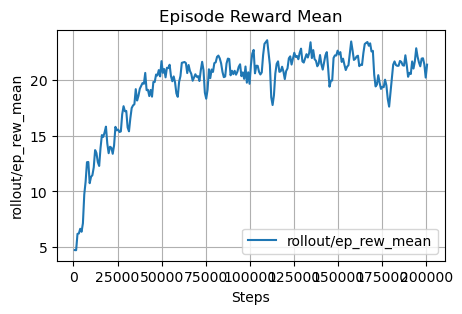

In [5]:
from tensorboard.backend.event_processing import event_accumulator


log_dir = "highway_ppo/PPO/PPO_1"

# Function to extract scalar metrics from TensorBoard logs
def extract_metrics(log_dir, scalar_name):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()

    # Extracting scalar values
    scalars = event_acc.Scalars(scalar_name)
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    return steps, values

# Plot function
def plot_metrics(log_dir, scalar_name, title):
    steps, values = extract_metrics(log_dir, scalar_name)
    
    plt.figure(figsize=(5, 3))
    plt.plot(steps, values, label=scalar_name)
    plt.xlabel('Steps')
    plt.ylabel(scalar_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting episode reward mean and length
plot_metrics(log_dir, 'rollout/ep_rew_mean', 'Episode Reward Mean')

## TODO: put evluation metrics and videos for PPO

In [5]:
Video("ppo_training_videos\episode_1000-episode-0.mp4")


In [4]:
Video("ppo_training_videos\episode_8000-episode-0.mp4")

We can see that although the model was trained for another 7000 episodes, the agent was only able to navigate the scenario for another 5 seconds compared to the model at 1000 episodes.

### Deep Q-Networks

In [ ]:
#simulate dqn trained agent
model = DQN.load("highway_dqn/model")

env = gym.make('custom-highway-v0', render_mode="rgb_array")
env.unwrapped.configure({
    "spawn_probability": 0,
})

for _ in range(10):
    obs, info = env.reset()
    done = truncated = False
    while not (done or truncated):
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        env.render()

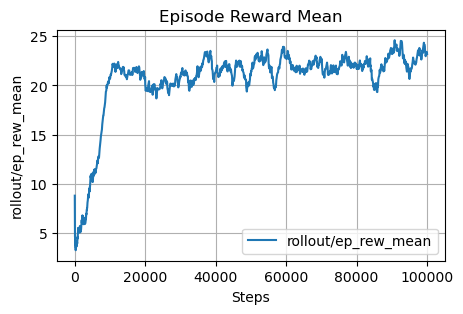

In [6]:
from tensorboard.backend.event_processing import event_accumulator


log_dir = "highway_dqn/DQN/DQN_1"

# Function to extract scalar metrics from TensorBoard logs
def extract_metrics(log_dir, scalar_name):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()

    # Extracting scalar values
    scalars = event_acc.Scalars(scalar_name)
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    return steps, values

# Plot function
def plot_metrics(log_dir, scalar_name, title):
    steps, values = extract_metrics(log_dir, scalar_name)
    
    plt.figure(figsize=(5, 3))
    plt.plot(steps, values, label=scalar_name)
    plt.xlabel('Steps')
    plt.ylabel(scalar_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting episode reward mean and length
plot_metrics(log_dir, 'rollout/ep_rew_mean', 'Episode Reward Mean')

## TODO: put evluation metrics and videos for DQN

In [6]:
Video("dqn_training_videos\episode_1000-episode-0.mp4")

In [7]:
Video("dqn_training_videos\episode_4000-episode-0.mp4")

The model performs quite well without crashing once during the episode, and seems to continue performing well even after another 3000 episodes.

### Advantage Actor Critic (A2C)

In [2]:
#simulate dqn trained agent
model = A2C.load("highway_a2c/model")

env = gym.make('custom-highway-v0', render_mode="rgb_array")
env.unwrapped.configure({
    "spawn_probability": 0,
})

for _ in range(10):
    obs, info = env.reset()
    done = truncated = False
    while not (done or truncated):
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        env.render()

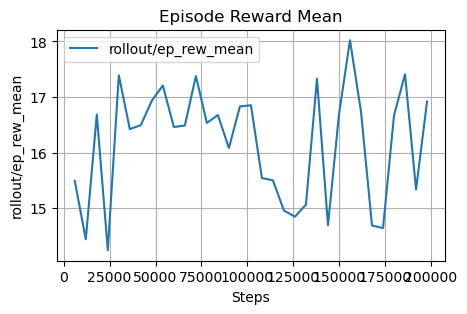

In [7]:
from tensorboard.backend.event_processing import event_accumulator


log_dir = "highway_a2c/A2C/A2C_1"

# Function to extract scalar metrics from TensorBoard logs
def extract_metrics(log_dir, scalar_name):
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()

    # Extracting scalar values
    scalars = event_acc.Scalars(scalar_name)
    steps = [s.step for s in scalars]
    values = [s.value for s in scalars]

    return steps, values

# Plot function
def plot_metrics(log_dir, scalar_name, title):
    steps, values = extract_metrics(log_dir, scalar_name)
    
    plt.figure(figsize=(5, 3))
    plt.plot(steps, values, label=scalar_name)
    plt.xlabel('Steps')
    plt.ylabel(scalar_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting episode reward mean and length
plot_metrics(log_dir, 'rollout/ep_rew_mean', 'Episode Reward Mean')

## TODO: put evluation metrics and videos for A2C

In [8]:
Video("a2c_training_videos\episode_1000-episode-0.mp4")

In [9]:
Video("a2c_training_videos\episode_9000-episode-0.mp4")

In both examples we can see that the model didn't improve greatly over the course of the episodes. Although some episodes could have had agents that perform much better, this does show that the model wasn't able to reach a converged state.

## Discussion

### Interpreting the Results

##### Reward Function

Our reward function mainly sought to configure the high_speed_reward and collision_reward parameters. As a highly antagonistic environment, it was important that we customized our reward function carefully so as to maximize training efficiency. To standardize our environment, we set the initial vehicle count to 6 and spawn probability to 0, then repeatedly reran our algorithms using different reward functions.

The first problem we ran into was when using a default collision_reward of -50 and high_speed_reward of 1. Since antagonistic drivers would break check the ego vehicle when in front, collisions were extremely common. Due to the large magnitude of the collision_reward, the agent, across all ML algorithms, would learn to forgo any attempts to drive fast and simply stay back at a low speed to avoid any other drivers. Even though the policy it learned to create would avoid collisions, it only caused the ego vehicle to avoid other drivers instead of navigating around them. We also found that, with this setup, training times were incredibly long. This can be attributed to the avoidance of antagonistic vehicles causing episodes to play out to their full 30 second runtime due to not crashing.

To correct this, our next iteration involved raising the high_speed_reward to 30. This greatly improved training times as the agent was actually moving forwards and learning from the collisions with the other vehicles. However, even after running for 200k time_steps, the resulting policy was extremely suboptimal and would result in collisions within the first few seconds when simulated. This is because the agent was over prioritizing speed, and was unable to react fast enough when the other vehicles brake checked it.

Our final reward function consisted of a collision_reward of -10 and a high_speed_reward of 2. With this, agents were still motivated to approach the other vehicles, and collisions provided a negative enough reward that they would start learning how to navigate through them. In most of the algorithms, they began to exhibit behavior of decelerating in anticipation to brake checks and changing lanes to avoid collisions. Though still slow, we were still able to train for 200k timesteps within a reasonable amount of time with this reward function.


#### Comparing Model Performance

TODO: add comparing metrics section

#### Why do the models struggle?  

In the original highway-v0 environment, an implementation of DQN was trained for 20K episodes and is able to successfully solve the environment with a mean reward for episodes of around 20. However, to get similar performance out of DQN in our antagonistic environment, we had to train it for 100K timesteps which speaks to the significant amount of data that DQN needs to learn a good policy within a reasonable timeframe. While we are able to train PPO and A2C for 200K timesteps, we were unable to do so for DQN. The extreme randomness of the antagonistic drivers may have also been too random for the model to effectively update its Q-values between iterations, further slowing learning. Other model extensions like Double DQN, which is more stable due to reduced overestimation, and Prioritized Experience Replay, which prioritizes more impactful experiences based on their TD error, may be more effective in solving this environment.

PPO updates its policy by performing multiple gradient updates on the same batch of data. Thus, it is very sensitive to the choice of step size which is difficult to select given the complex nature of the environment. The extreme unpredictability also means the direction of steepest reward improvement can change rapidly, leading to instability for gradient descent models like PPO. Despite the fact that both PPO and A2C are both policy gradient methods, PPO is more sample efficient which may have led to better (but still poor) performance given the same amount of training time. While both DQN and PPO both showed relatively increasing episode reward means over time, A2C’s episode reward means were highly varied even when trained for 200K timesteps.


### Limitations

This environment is an abstraction of a more complex autonomous driving environment. Despite the randomness implemented through antagonistic agents, the course itself in our custom environment is very structured unlike actual highways that might curve. Additionally, we don't account for elevation since this is a 2D environment. For example, a car should decelerate when going down a hill and compensate acceleration when going up. 

These highway environments do not also account for other vehicles like pedestrians and cyclists that you may see in a more dense urban environment. However, since high speed crashes tend to be more destructive and highway assistance is the current extent of allowed autonomous driving, we chose to focus on highway driving. 

Future work could include different sizes of agents (ie. long trucks should have different behavior than a sedan), randomly generated highways where the number of lanes changes, or road work that restricts driving. 


### Ethics & Privacy

For this project, we will be using a custom OpenAI Gym environment and utilize the environment to run simulations, train our agent, and perform tests and analysis. Since our project does not work with human subjects or external data, there are no data privacy concerns.  We will ensure that we properly cite the contributions that we found helpful to get started with our project and adhere to all ethical guidelines that the creators of the custom Gym environment want us to follow.

We acknowledge the potential unintended consequences of deploying a RL agent with real-world implications and will preface our work with a disclaimer that our project’s purpose is purely scientific and experimental. Autonomous vehicles are a current area of research, with varying degrees of automation deployed on actual roads and tested by technology companies. Since near or completely autonomous driving has not been approved yet, we do not recommend directly applying our work to real-life environments and instead recommend our work be used to inform future self-driving algorithms. If our algorithms were to be deployed, we would ensure a human-in-the-loop that could take over in the event of potentially dangerous actions from the agent and implement standard vehicle safety features such as ultrasonic proximity sensors, blind-spot monitoring, automatic emergency braking, and lane departure warnings to ensure the safety of the passengers.


### Conclusion

In this study we aimed to train agents to navigate the Highway task whilst being surrounded by antagonistic drivers using DQN, A2C, and PPO reinforcement learning algorithms. Despite extensive training, our models were not able to achieve consistent success in the scenario. We did find that the DQN and PPO algorithms performed better than the A2C algorithm. The antagonistic behaviors of the other drivers in the environment proved difficult and created significant challenges. However, this difficulty may mirror real-world scenarios where even skilled drivers may struggle to navigate safely around antagonistic drivers. Future work should focus on developing or testing more robust RL algorithms or exploring different training strategies. 

# Footnotes
<a name="umich"></a>1.[^](#umich): https://css.umich.edu/publications/factsheets/mobility/autonomous-vehicles-factsheet<br> 
<a name="nhtsa"></a>2.[^](#nhtsa): https://www.nhtsa.gov/vehicle-safety/automated-vehicles-safety<br>
<a name="rlsurvey"></a>3.[^](#rlsurvey): https://www.sciencedirect.com/science/article/abs/pii/S0957417423009971  
<a name="fatalitystates"></a> 4.[^](#fatalitystates): https://www.iihs.org/topics/fatality-statistics/detail/yearly-snapshot  
<a name="rl-algs"></a> 5.[^](#rl-algs): https://cse.buffalo.edu/~avereshc/rl_fall20/Comparison_of_RL_Algorithms_vvelivel_sudhirya.pdf